In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
np.random.seed(seed=24)


In [6]:
random_integers = np.random.randint(low=1,high=5,size=100)


In [7]:
is_equal_to_3 = random_integers == 3


In [8]:
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [9]:
sum(is_equal_to_3)


22

In [13]:
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [23]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[:]

b4937915-ad67     True
a9d910f4-fe9a     True
a3e05a29-d6df     True
ddcc7278-7017     True
f31d1048-5fa9     True
                 ...  
a5f32385-4fb0    False
e11c35b9-074a    False
fa74ea39-6fa4    False
6443472f-4aa8    False
ece84f3e-6170    False
Name: ID, Length: 29687, dtype: bool

In [25]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)
#To display all the duplicates id's use print function  
#print(dupe_ids)

313

In [27]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(20)
# In the below datasets we observed that their is some entire rows data iz zero i.e.means invalid data  for us so we could 
#delete  this enrire  row which has zero("0")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
12953,a3e05a29-d6df,210000,2,1,1,36,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
13053,a3e05a29-d6df,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17987,b4937915-ad67,240000,1,3,2,36,0,0,0,0,...,93057,55419,59336,10000,10000,10000,5000,5000,5000,0
18087,b4937915-ad67,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28250,a9d910f4-fe9a,140000,2,2,1,34,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
28350,a9d910f4-fe9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_zero_mask = df == 0


In [32]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

#print(feature_zero_mask)


315

In [33]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()
#~, to select all the rows that don't have zeros for all the features and response
#: to select all columns

In [38]:
df_clean_1.shape

(29685, 25)

In [39]:
df_clean_1['ID'].nunique()


29685

In [42]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [45]:
df_clean_1['PAY_1'].head()

#"The measurement scale for the repayment status is: -1 = pay duly;
#1 = payment delay for one month; 2 = payment delay for two months; . . .;
#8 = payment delay for eight months; 9 = payment delay for nine months and above" 

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [46]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [47]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]
#find all the rows that don't have missing data for the PAY_1 feature:

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [48]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
#we make a another copy of this datasets 

In [50]:
sum(valid_pay_1_mask)
print(valid_pay_1_mask)

0        True
1        True
2        True
3        True
4        True
         ... 
29995    True
29996    True
29997    True
29998    True
29999    True
Name: PAY_1, Length: 29685, dtype: bool


In [54]:
df_clean_2.shape

(26664, 25)

In [55]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [56]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()
#-2 means the account started that month with a zero balance, and never used any credit
#-1 means the account had a balance that was paid in full
#0 means that at least the minimum payment was made, but the entire balance wasn't paid (that is, a positive balance was carried to the next month)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [57]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [58]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [59]:
df_clean_2['EDUCATION_CAT'] = 'none'


In [60]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [61]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [62]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [64]:
import matplotlib.pyplot as plt 
%matplotlib inline


In [65]:
import matplotlib as mpl

In [66]:
mpl.rcParams['figure.dpi'] = 400

In [67]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)
df_with_ohe.to_csv('cleaned_data.csv', index=False)


array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

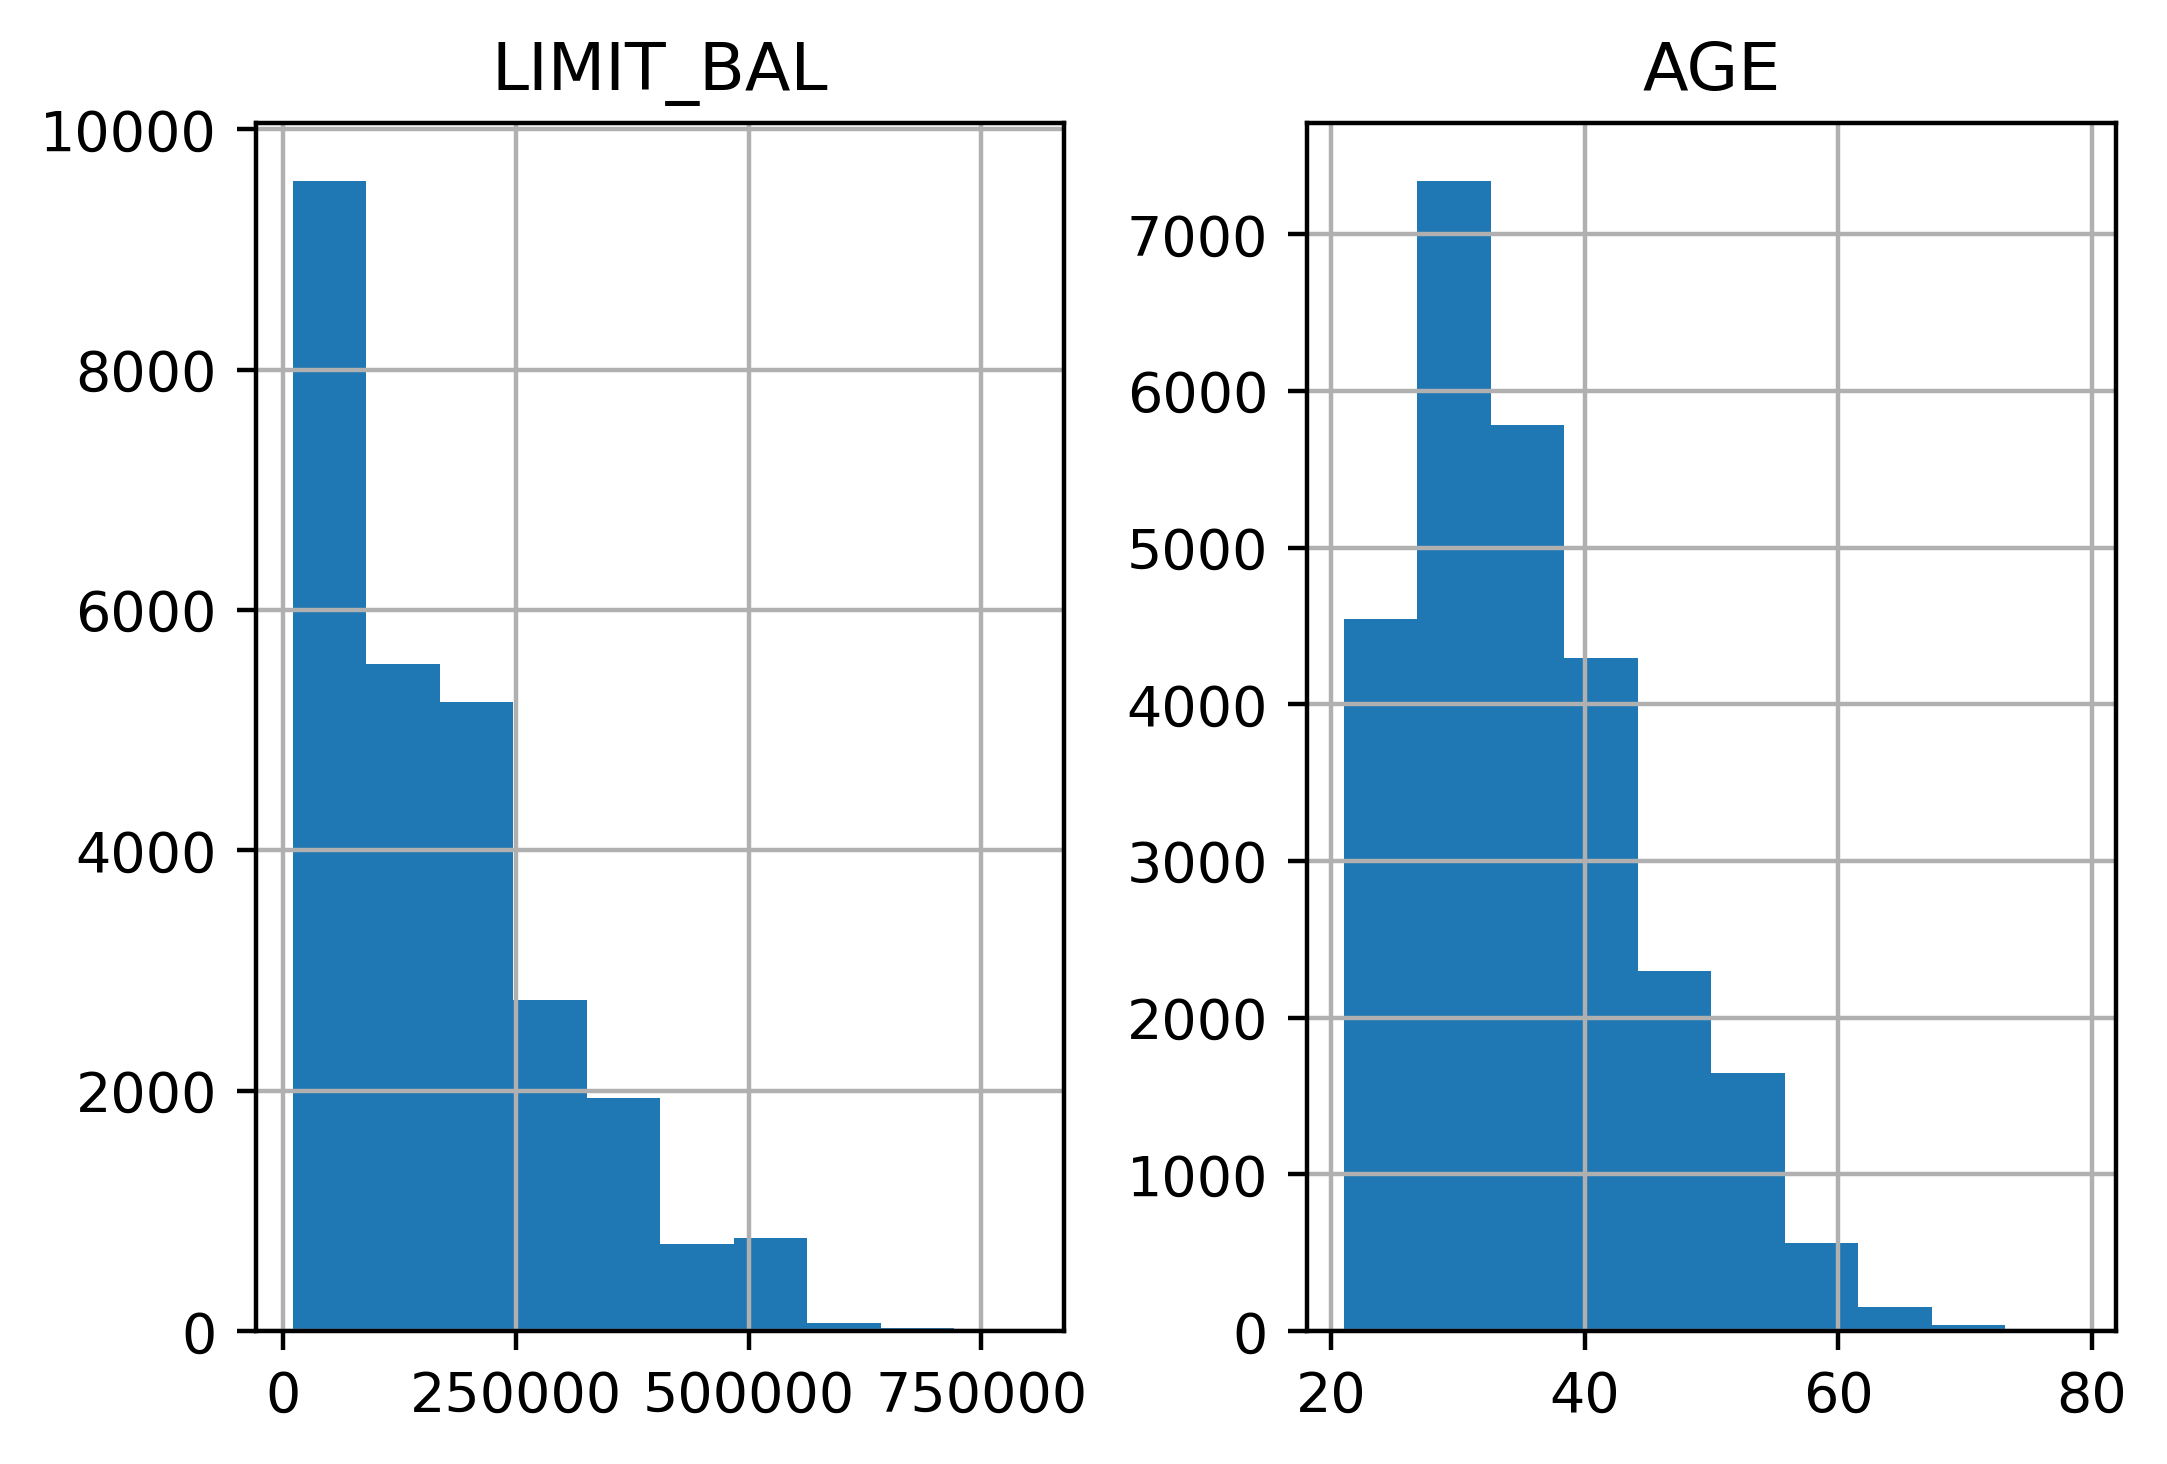

In [68]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>]], dtype=object)

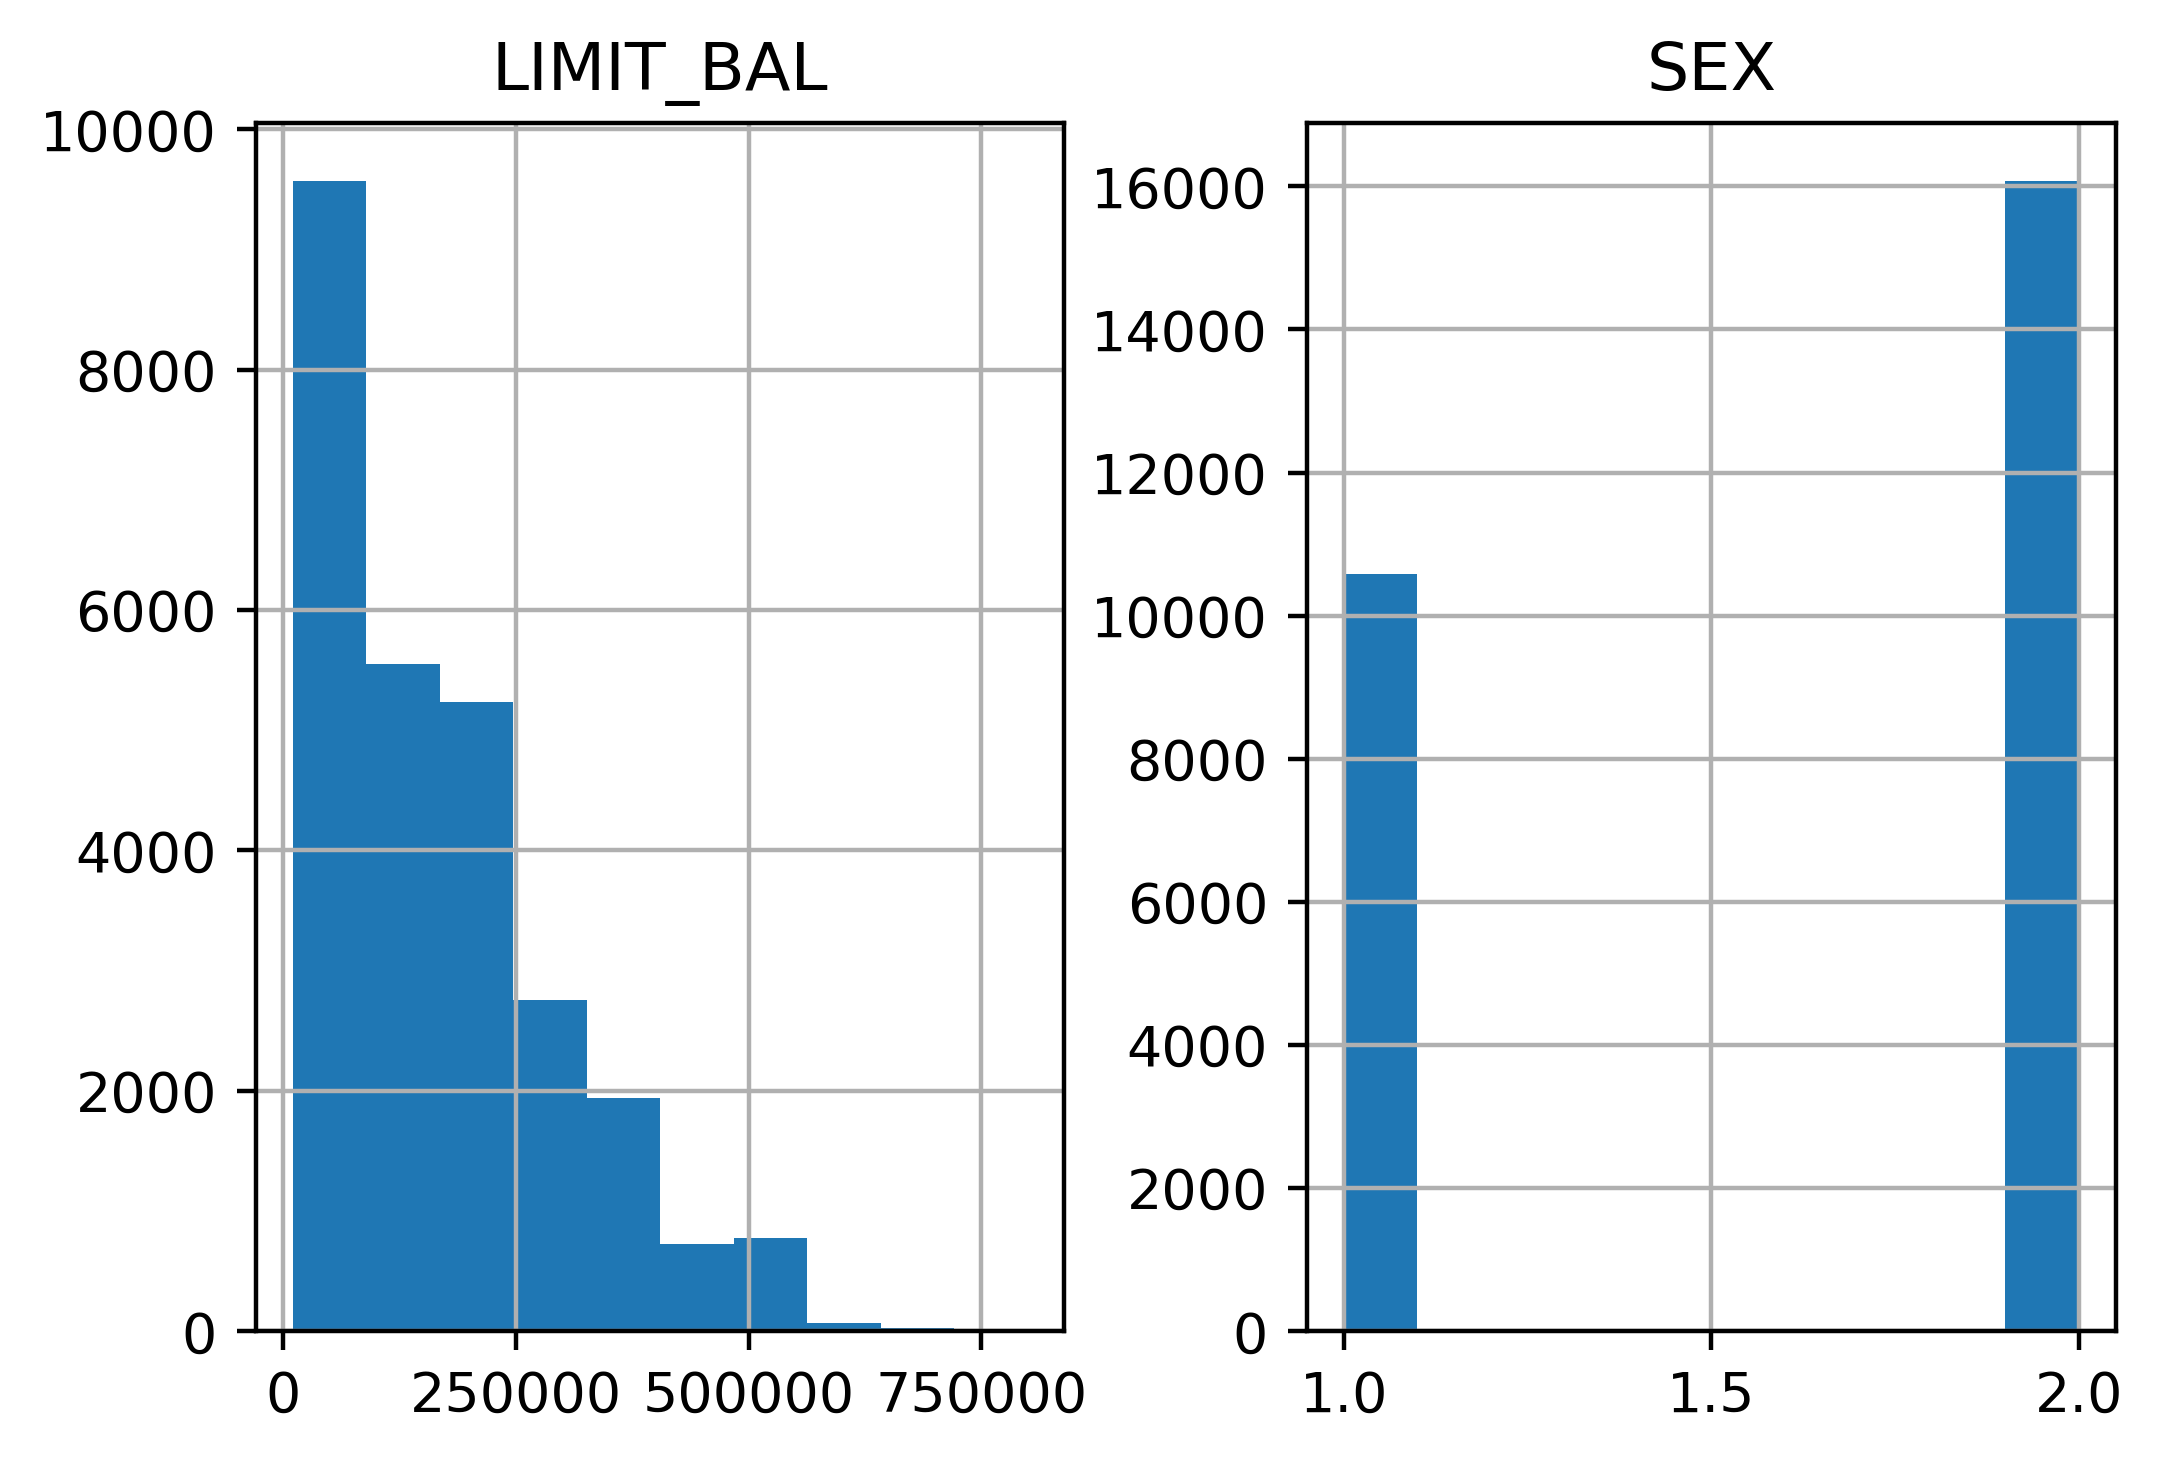

In [69]:
df_clean_2[['LIMIT_BAL', 'SEX']].hist()

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>]], dtype=object)

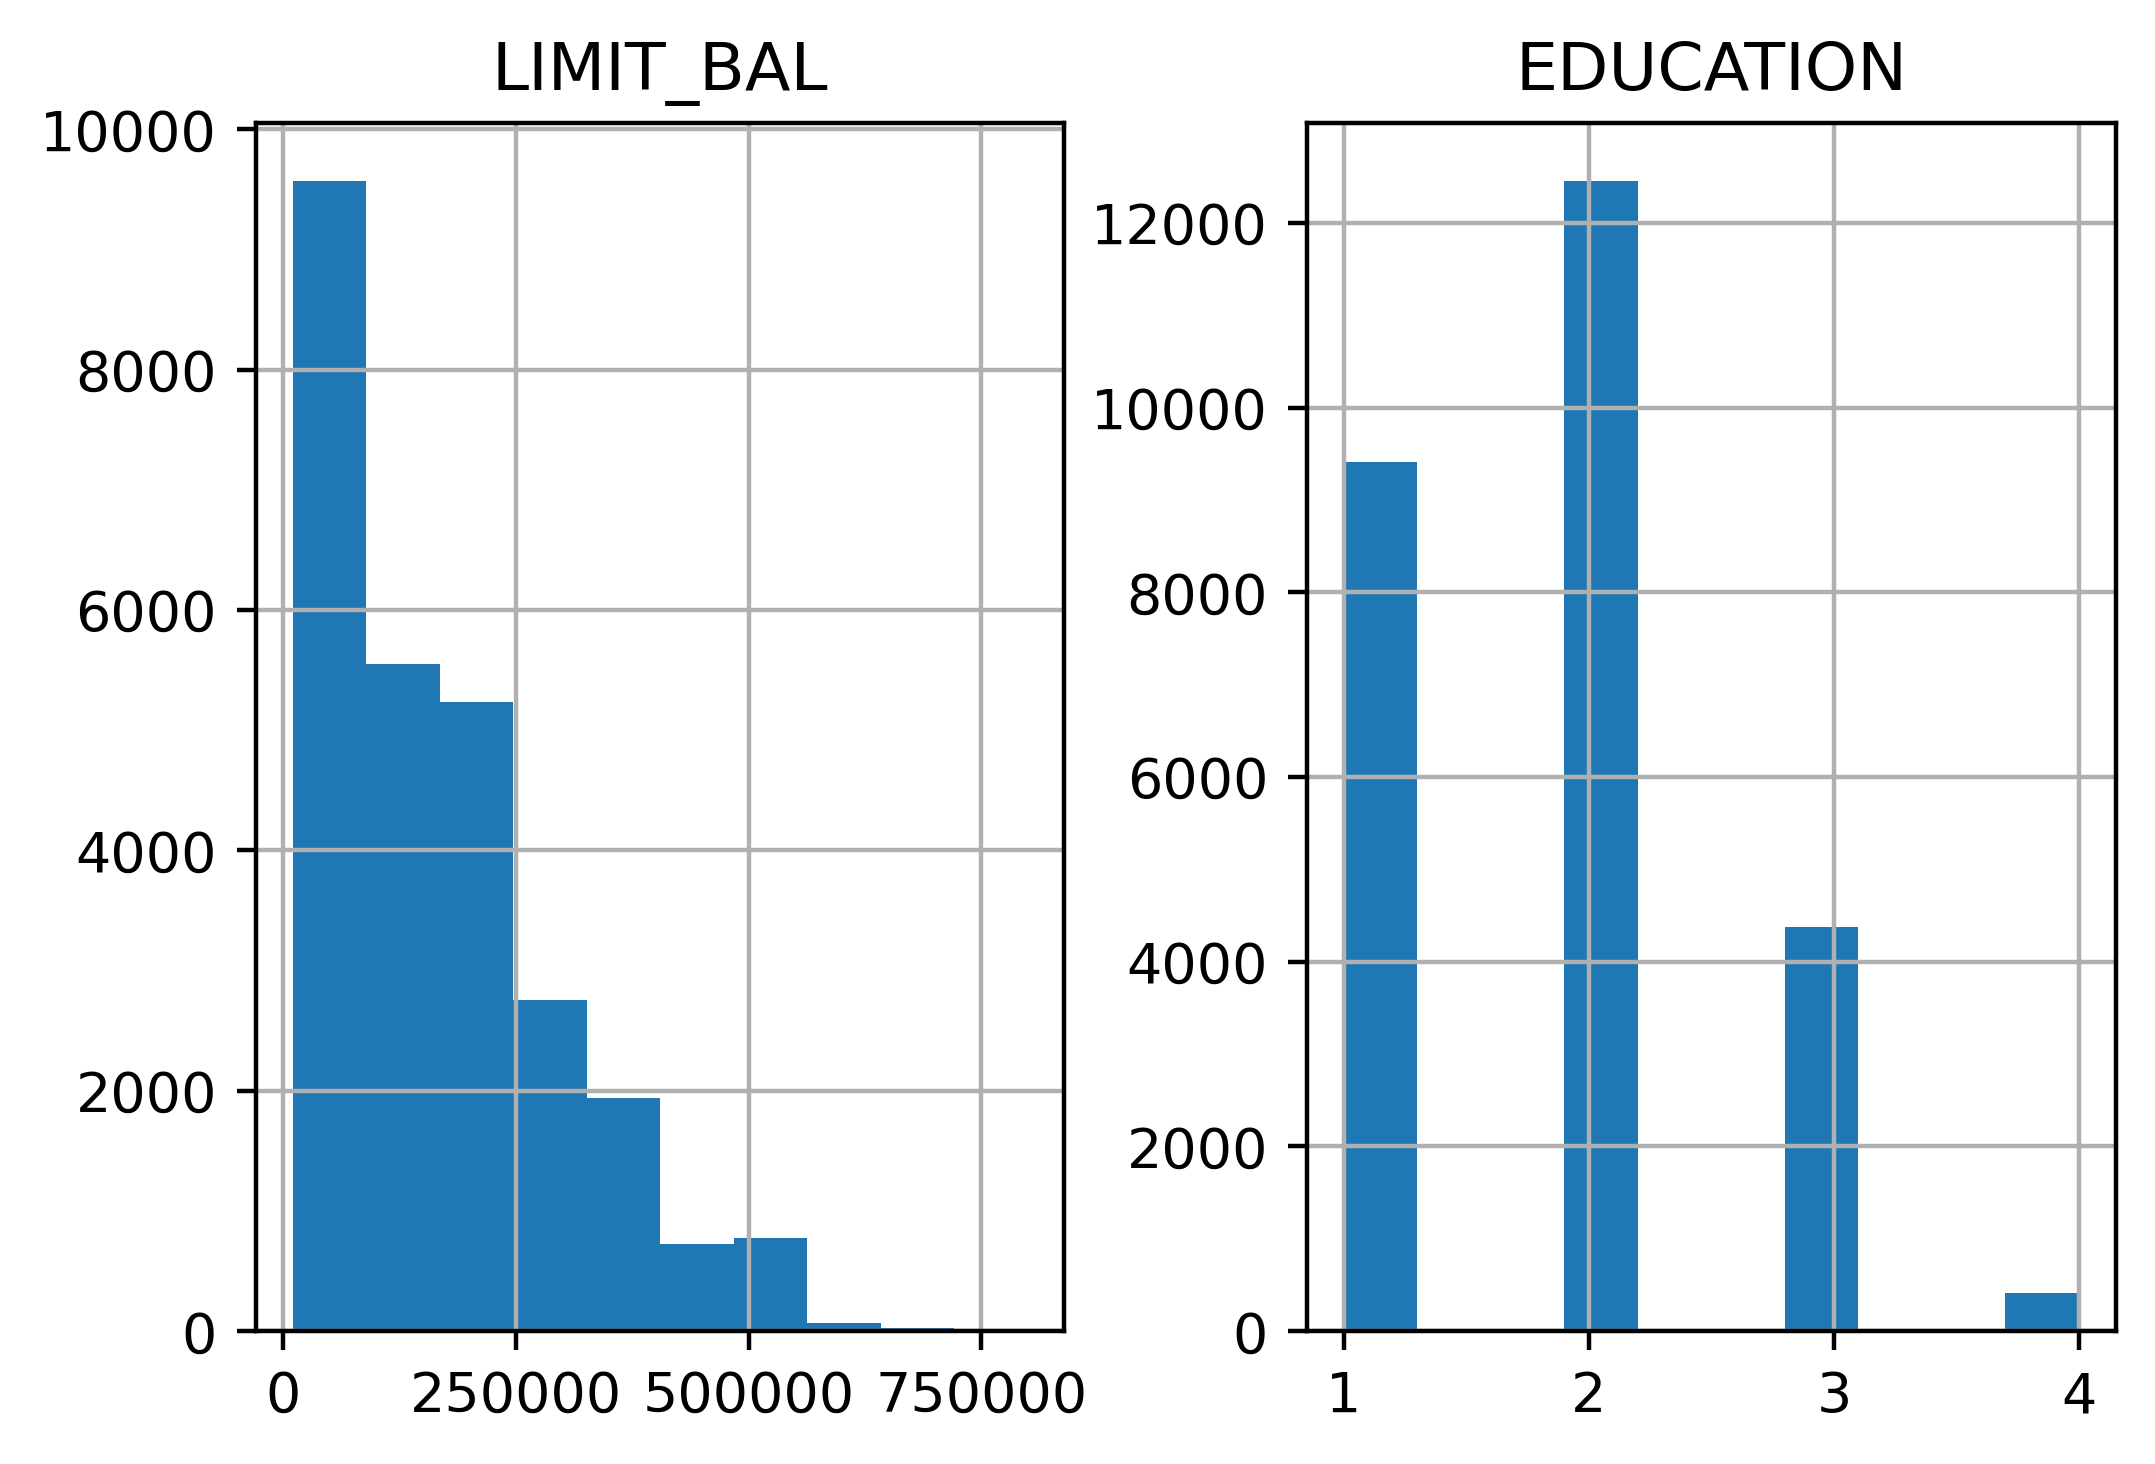

In [70]:
df_clean_2[['LIMIT_BAL', 'EDUCATION']].hist()

In [71]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [72]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [73]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [74]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [75]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

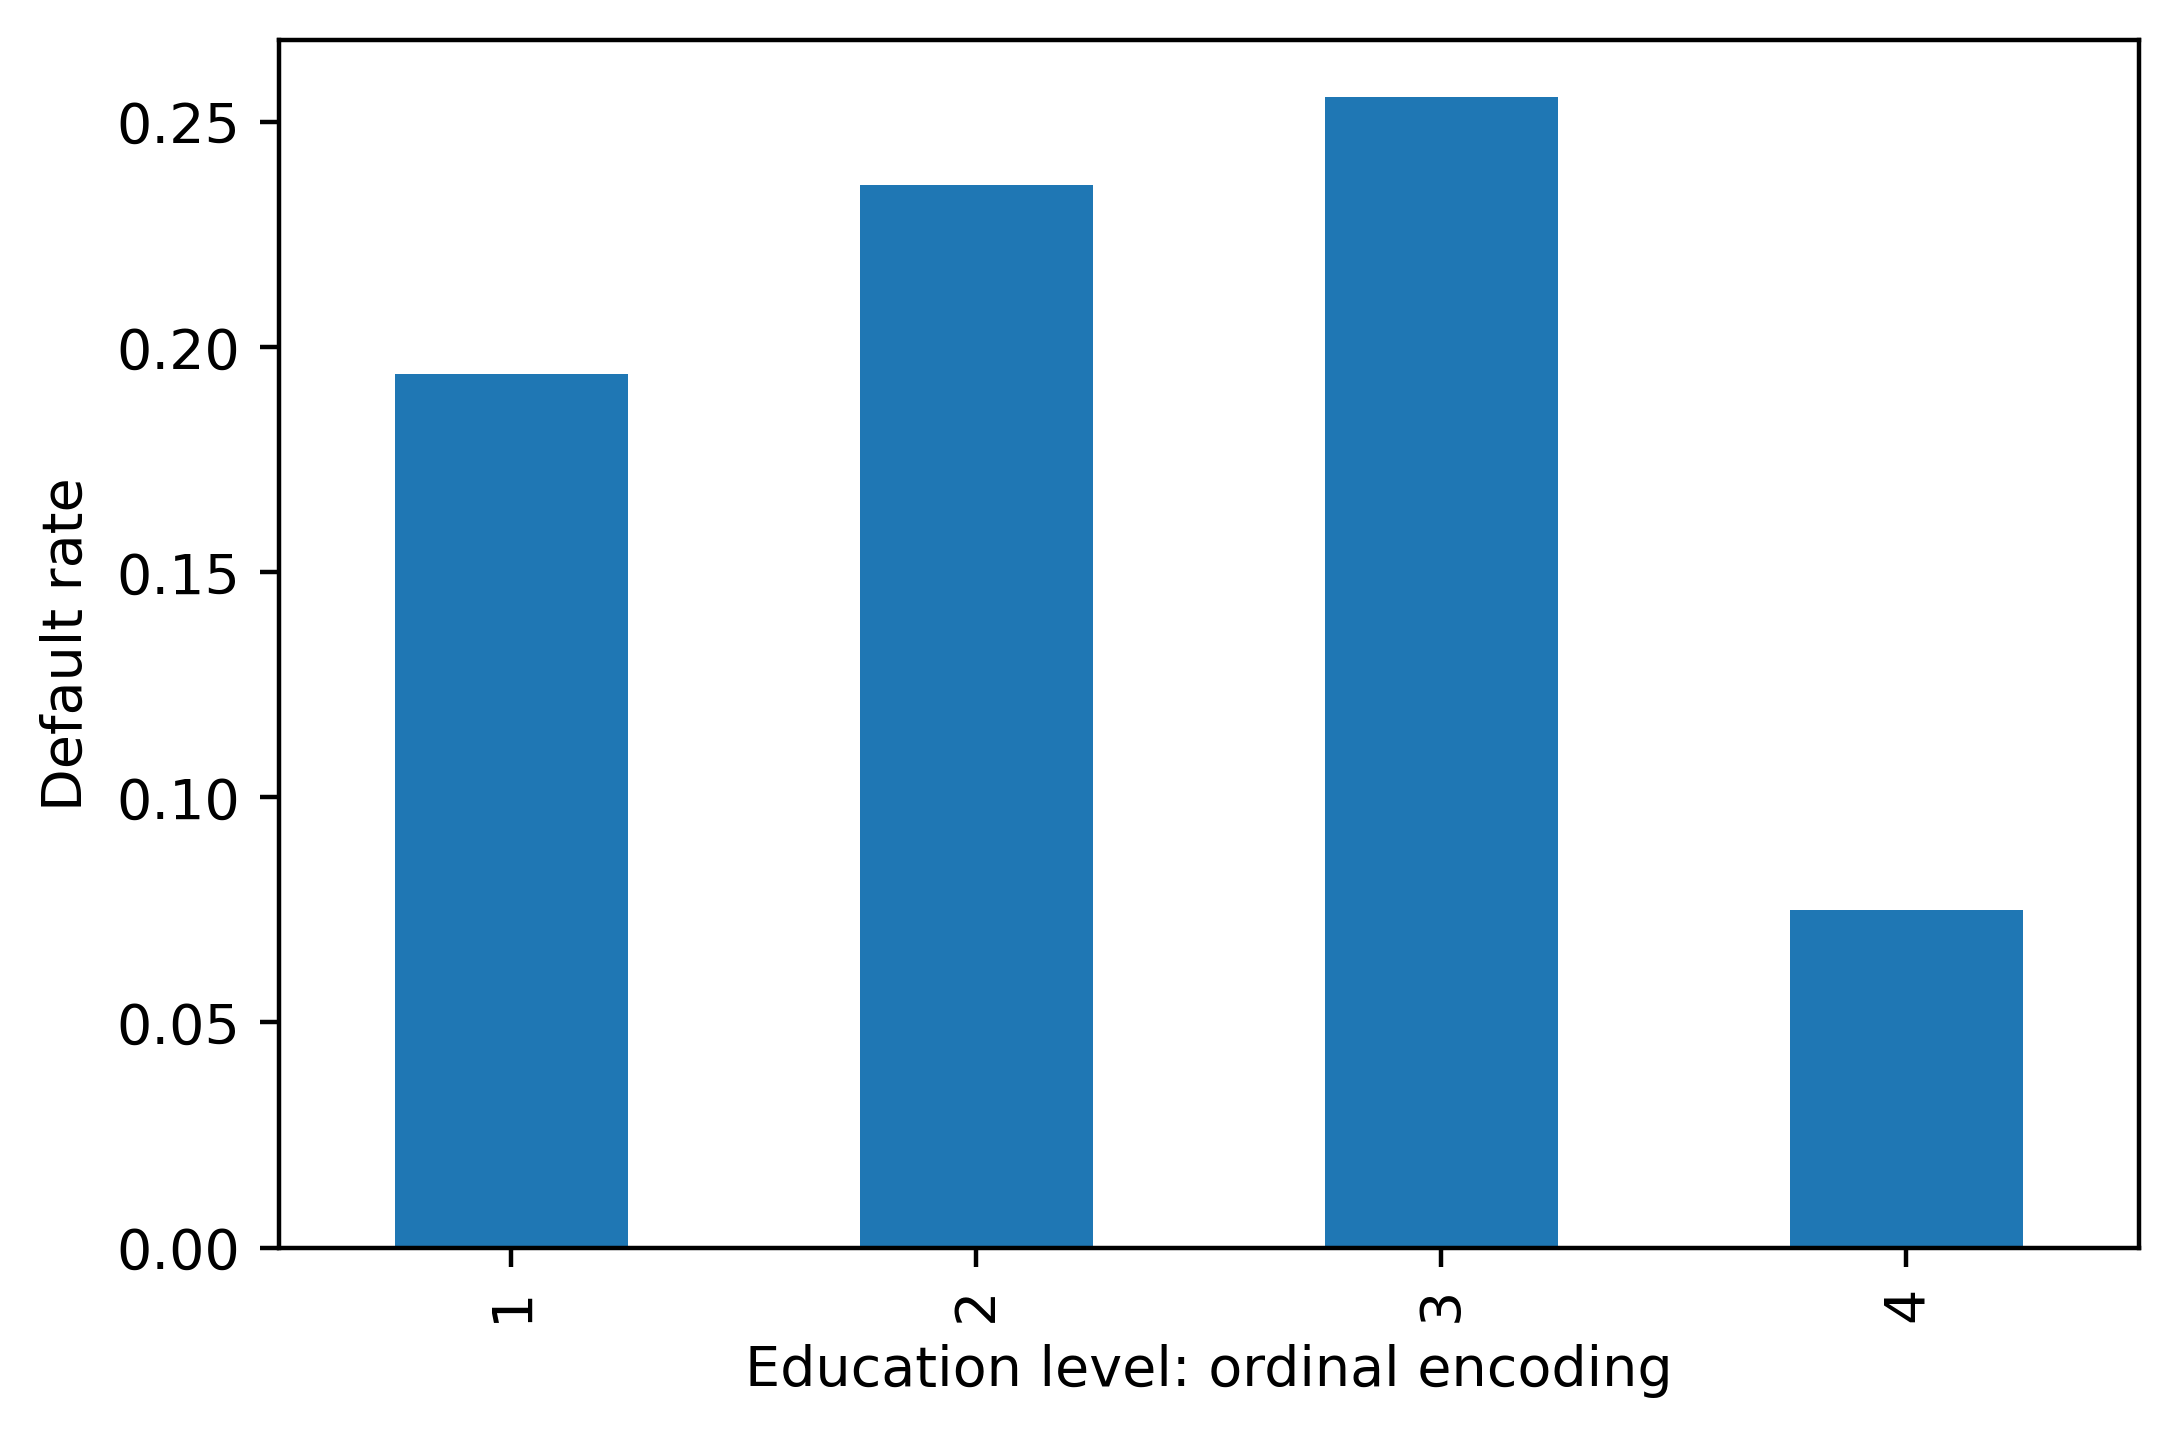

In [76]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

#one-hot encoding (OHE
#OHE is a way to transform a categorical feature, which may consist of text labels in the raw data,
#into a numerical feature that can be used in mathematical models.

In [77]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [98]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [99]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [100]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [101]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [102]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [103]:
df_with_ohe.to_csv('cleaned_data_pramod.csv', index=False)

In [104]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [105]:
df[pay_feats].describe()

,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033
std,1.191215,1.191096,1.162348,1.127519,1.144981
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


In [115]:
df[pay_feats[0]].value_counts().sort_index()


TypeError: '<' not supported between instances of 'str' and 'int'

TypeError: '<=' not supported between instances of 'int' and 'str'

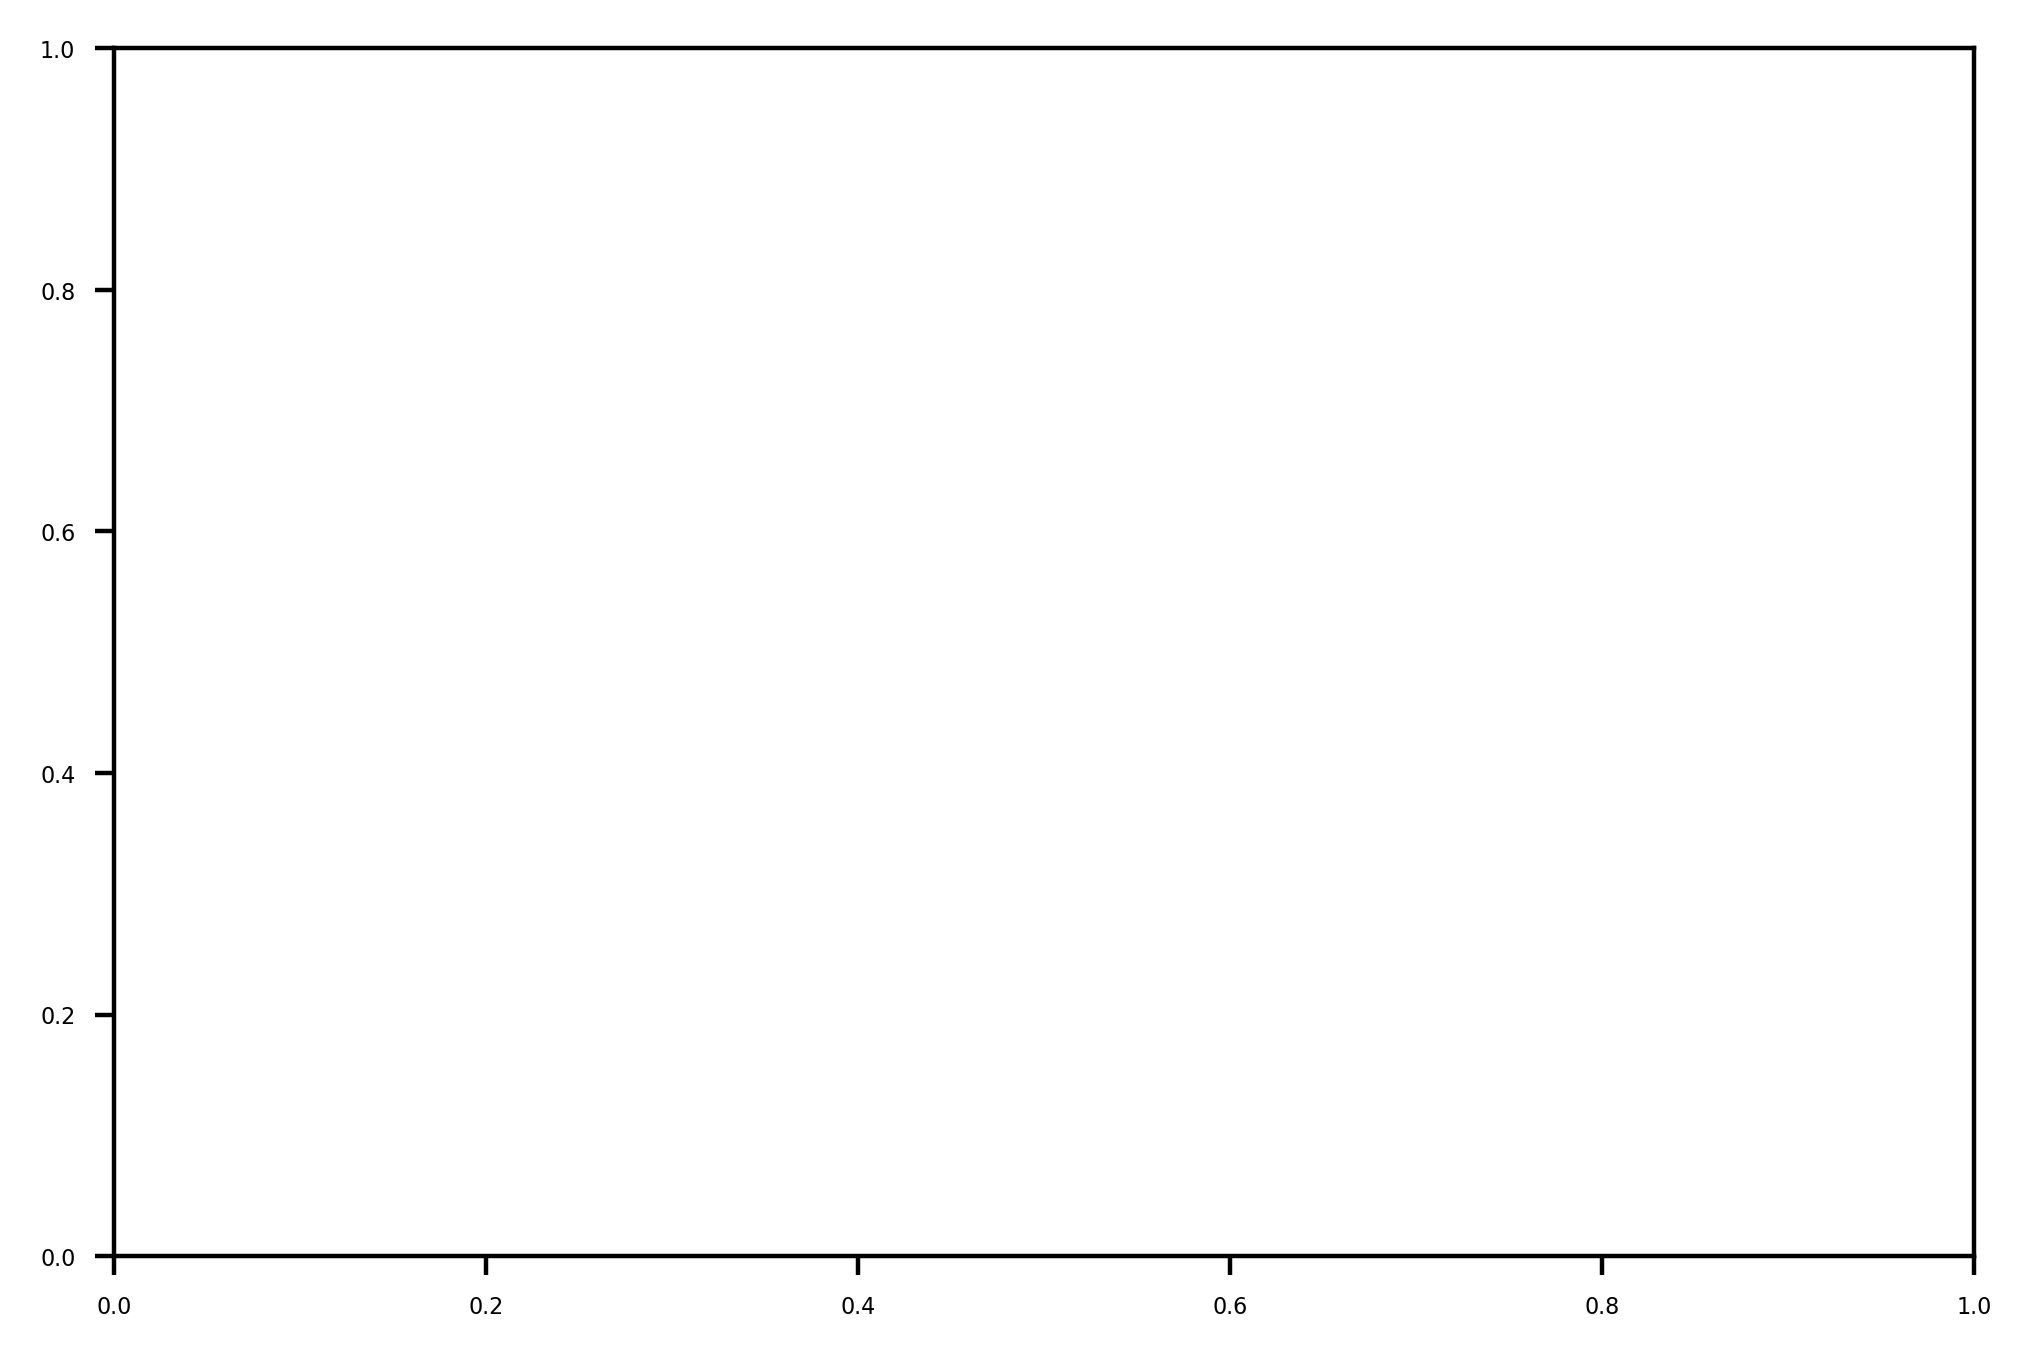

In [116]:
df[pay_feats[0]].hist()

In [94]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

TypeError: '<=' not supported between instances of 'int' and 'str'

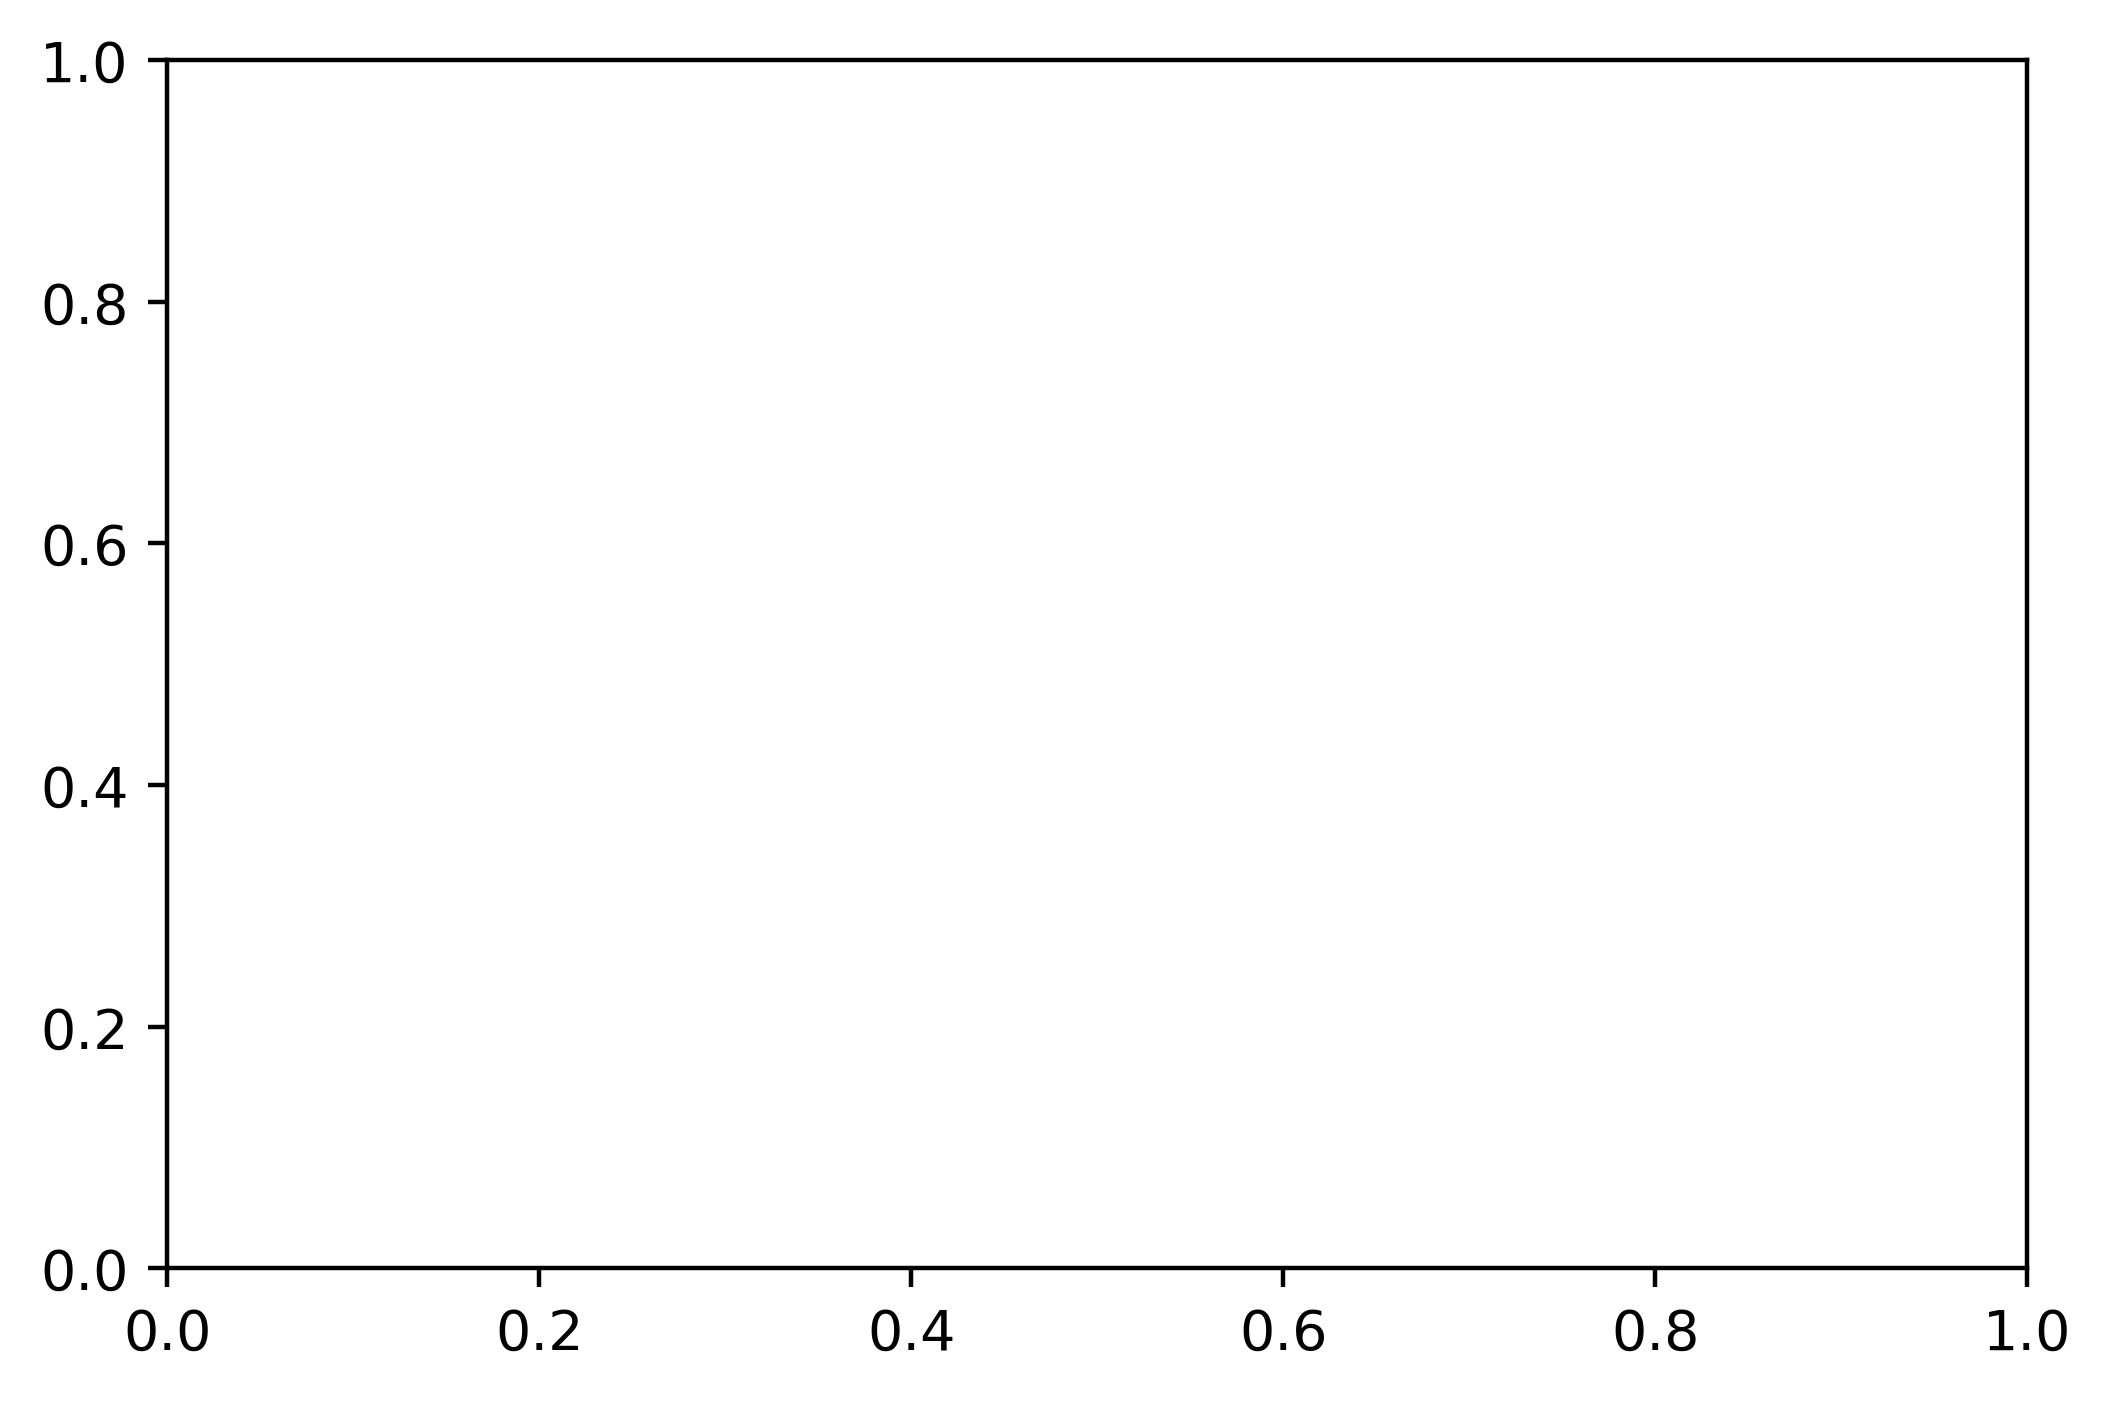

In [95]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>, <AxesSubplot:>]],
      dtype=object)

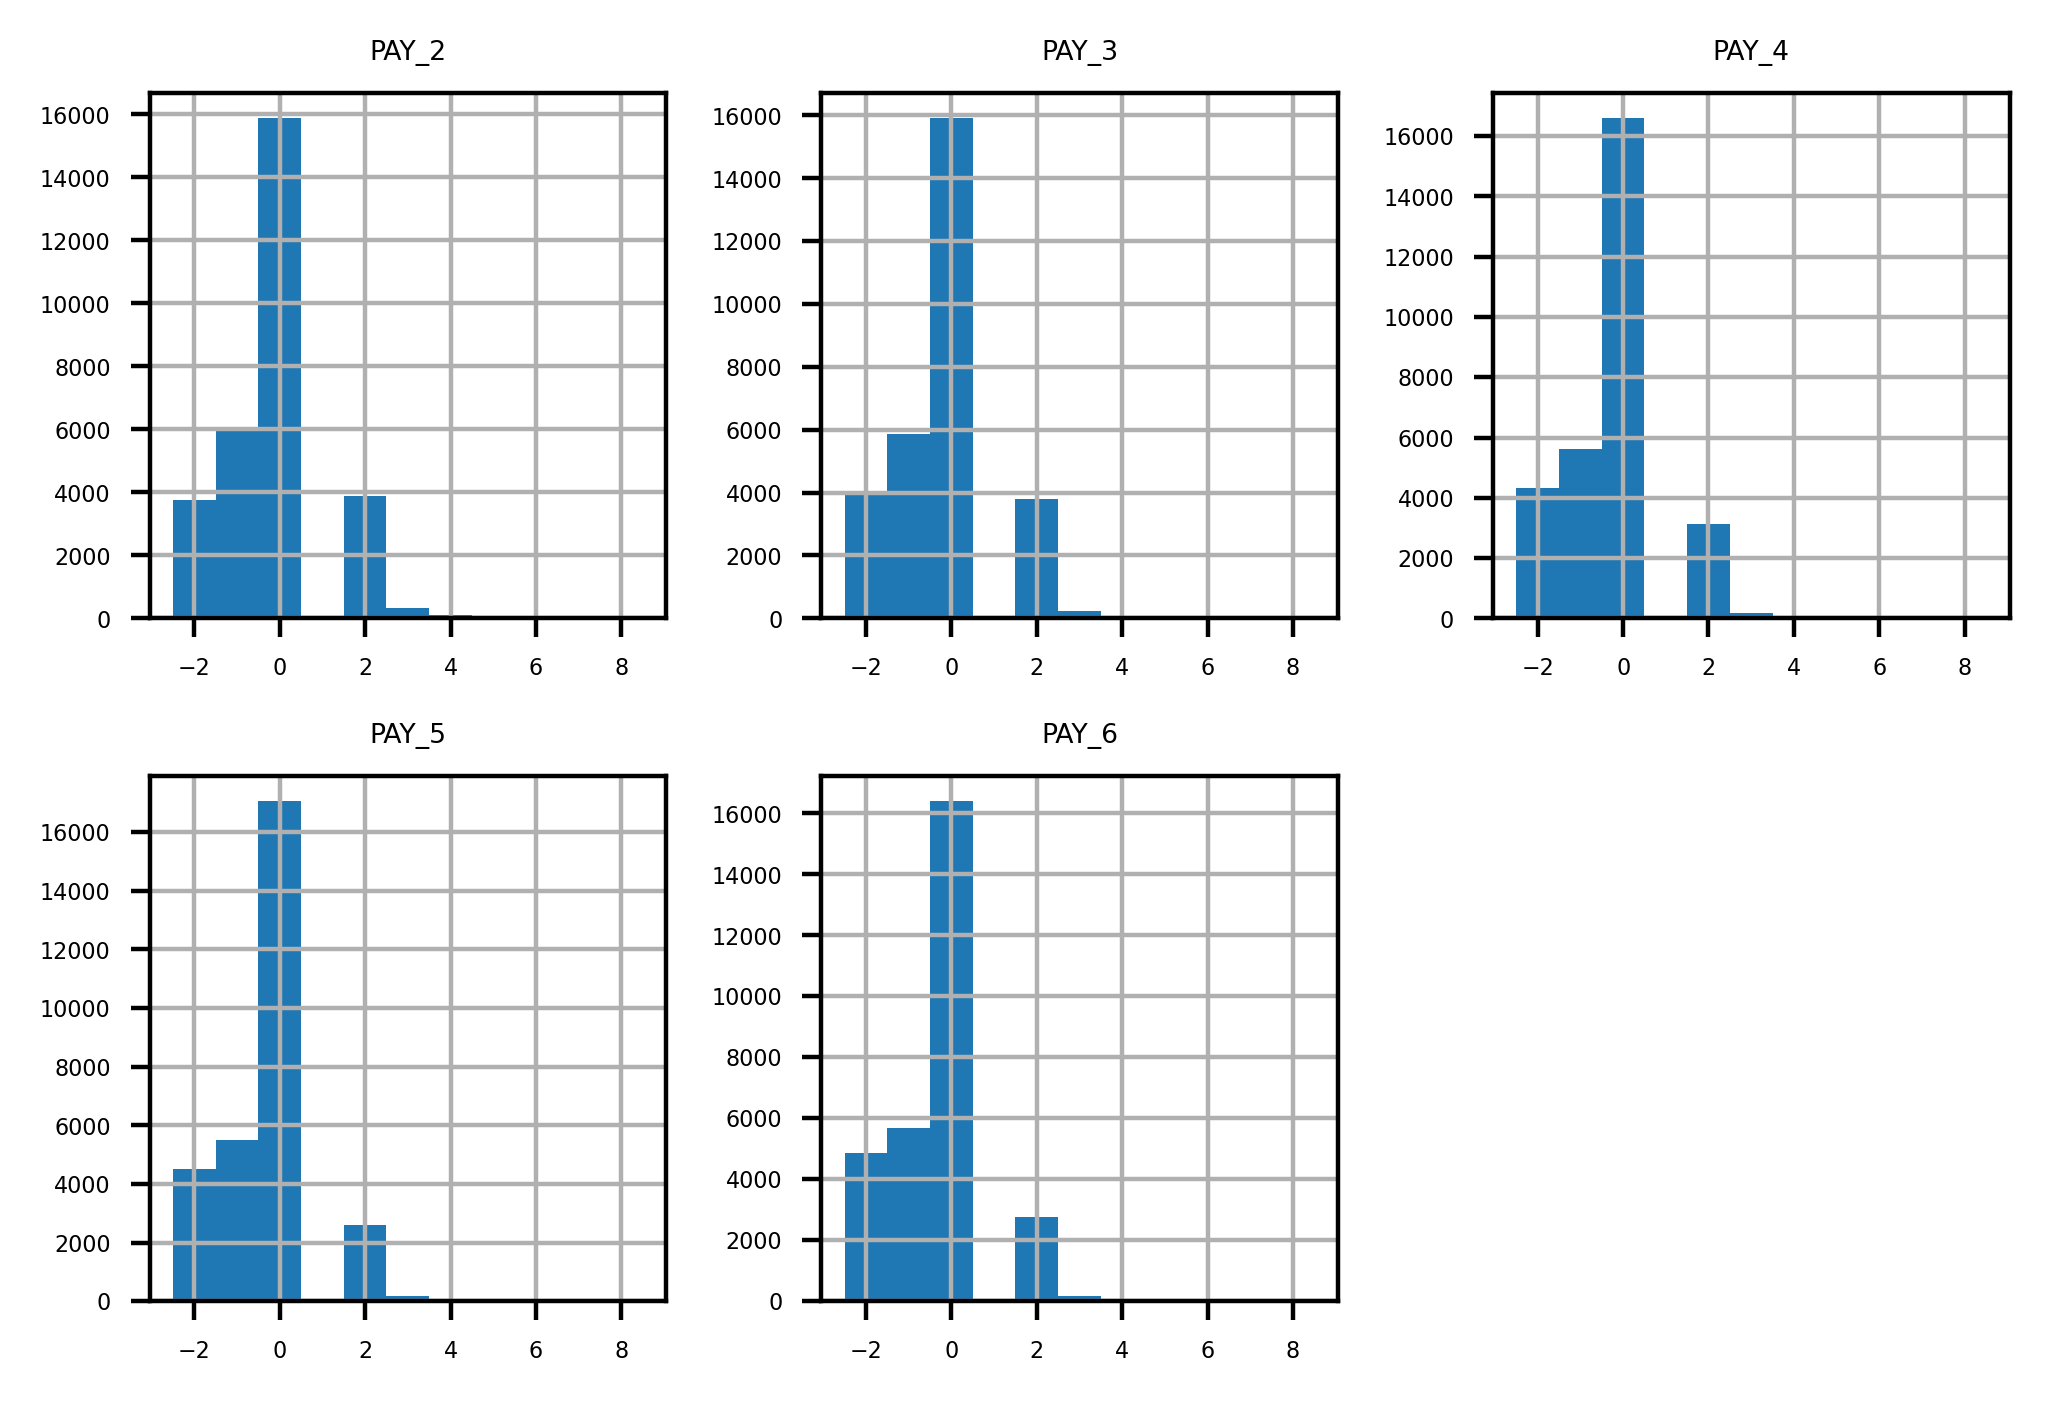

In [96]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [97]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2
